In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ecommerce_shipping.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
df = df.drop("ID", axis=1)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
# Categorical type of columns
categorical_list = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
for column in categorical_list:
    print(df[column].value_counts().sort_index())
    print(df[column].value_counts().sum())
# df['Warehouse_block'].value_counts().sort_index()

A    1833
B    1833
C    1833
D    1834
F    3666
Name: Warehouse_block, dtype: int64
10999
Flight    1777
Road      1760
Ship      7462
Name: Mode_of_Shipment, dtype: int64
10999
1    2235
2    2165
3    2239
4    2189
5    2171
Name: Customer_rating, dtype: int64
10999
high       948
low       5297
medium    4754
Name: Product_importance, dtype: int64
10999
F    5545
M    5454
Name: Gender, dtype: int64
10999
0    4436
1    6563
Name: Reached.on.Time_Y.N, dtype: int64
10999


### Check the Outliers

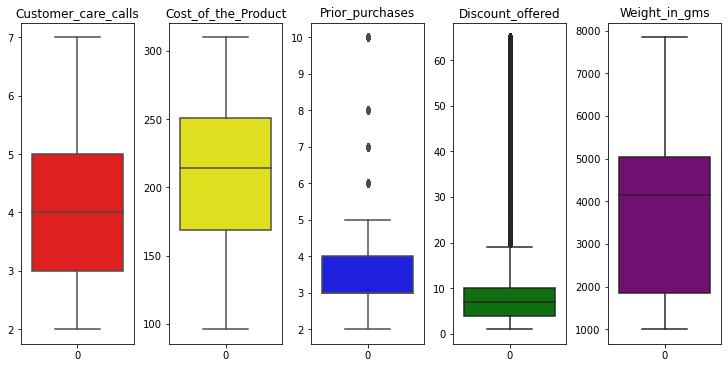

In [8]:
# Numerical type of columns
numerical_list = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
fig, axes = plt.subplots(ncols=5, figsize = (10, 5), constrained_layout=True)
clr = ['red', 'yellow', 'blue', 'green', 'purple']
for i, column in enumerate(numerical_list):
    axes[i].set_title(column)
    sns.boxplot(data = df[column], color = clr[i], ax = axes[i])
plt.show()

### Make Histogram

### Correlation

<AxesSubplot:>

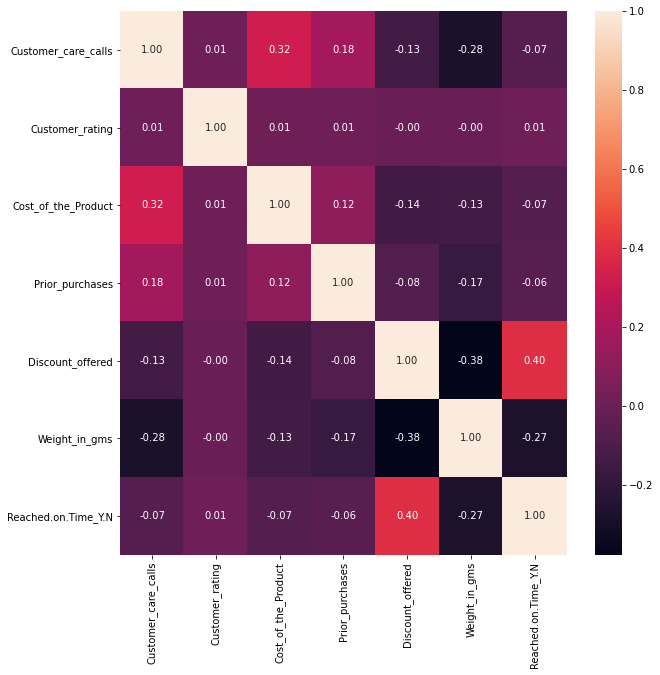

In [9]:
# heatmap corrleation
plt.figure(figsize = (10,10))
#sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'bone')
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

### Scaling visualization

In [10]:
scaling_target = [
                'Customer_care_calls',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Discount_offered',
                'Weight_in_gms'
                 ]
scaling_df = pd.DataFrame(df, columns = scaling_target)

In [11]:
# def : scaling data using Standard, minmax, robust
# input : target of scaling feature
# return : dataframe after scaling
def Scaling(data):
    std_Scaler = StandardScaler()
    scaled_df_s = std_Scaler.fit_transform(data)
    scaled_df_s = pd.DataFrame(scaled_df_s, columns = scaling_target)
    
    mm_Scaler = MinMaxScaler()
    scaled_df_m = mm_Scaler.fit_transform(data)
    scaled_df_m = pd.DataFrame(scaled_df_m, columns = scaling_target)
    
    rb_Scaler = RobustScaler()
    scaled_df_r = rb_Scaler.fit_transform(data)
    scaled_df_r = pd.DataFrame(scaled_df_r, columns = scaling_target)
    
    return scaled_df_s, scaled_df_m, scaled_df_r

In [12]:
standardDF, minmaxDF, robustDF = Scaling(scaling_df)

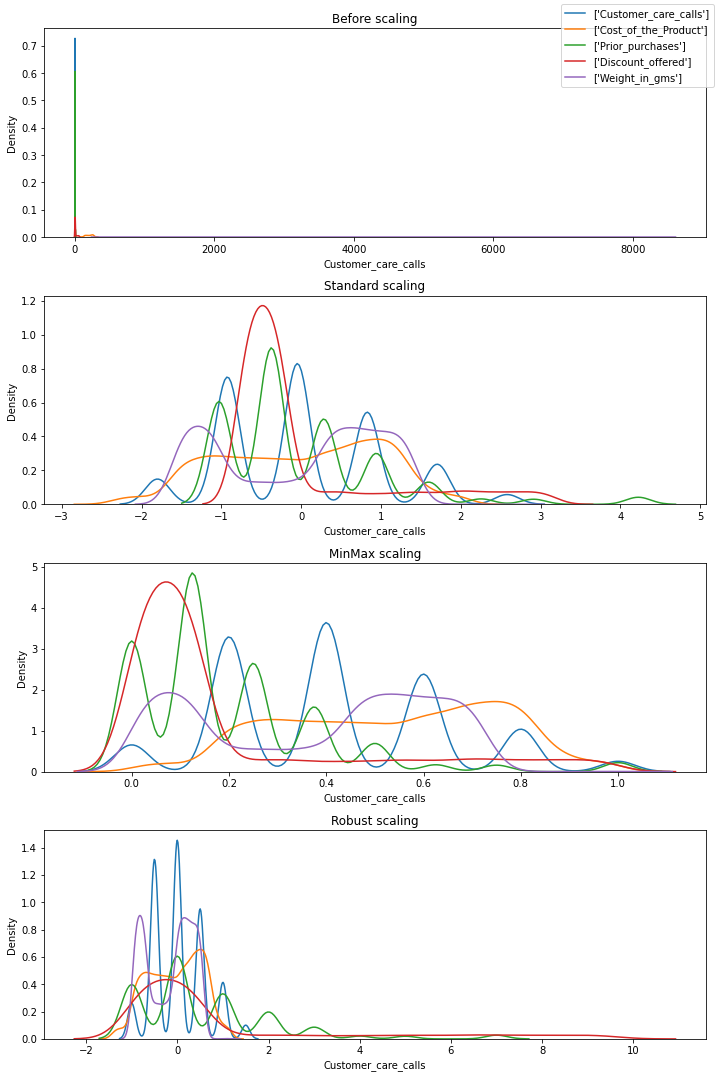

In [13]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (10,15))
ax1.set_title('Before scaling')
ax2.set_title('Standard scaling')
ax3.set_title('MinMax scaling')
ax4.set_title('Robust scaling')

for features in scaling_target :
    sns.kdeplot(df[features], label = [features], ax = ax1)
    sns.kdeplot(standardDF[features], ax = ax2)
    sns.kdeplot(minmaxDF[features], ax = ax3)
    sns.kdeplot(robustDF[features], ax = ax4)
    

plt.tight_layout()
fig.legend()
plt.show()

In [14]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0, 1] # range of target
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

In [15]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    df[feature_name] = label_encoder.fit_transform(df[feature_name])
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


In [16]:
criterion = ["gini", "entropy"]
solver = ["newton-cg", "lbfgs", "sag", "saga"]
depth = range(2, 12)
n_ = range(3, 12, 2)
models = []
for c in criterion:
    for d in depth:
        models.append(DecisionTreeClassifier(criterion=c, max_depth = d))
for s in solver:
    models.append(LogisticRegression(solver=s, max_iter=5000))
for n in n_:
    models.append(KNeighborsClassifier(n_neighbors=n))
models

[DecisionTreeClassifier(max_depth=2),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=4),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=6),
 DecisionTreeClassifier(max_depth=7),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=11),
 DecisionTreeClassifier(criterion='entropy', max_depth=2),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 DecisionTreeClassifier(criterion='entropy', max_depth=4),
 DecisionTreeClassifier(criterion='entropy', max_depth=5),
 DecisionTreeClassifier(criterion='entropy', max_depth=6),
 DecisionTreeClassifier(criterion='entropy', max_depth=7),
 DecisionTreeClassifier(criterion='entropy', max_depth=8),
 DecisionTreeClassifier(criterion='entropy', max_depth=9),
 DecisionTreeClassifier(criterion='entropy', max_depth=10),
 DecisionTreeClassifier(criterion='entropy', max_depth=11),
 LogisticRegression(max_it

In [17]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

In [18]:
def findBest(X, y, scaler=scalers, model=models, cv_k=range(2, 8)):
    best_score = 0
    best_scaler = None
    best_model = None
    best = []
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    for s in scaler:
        s.fit_transform(X_train, y_train)
        
        for m in models:
            m.fit(X_train, y_train)
            
            y_pred = m.predict(X_test)
            
            score = accuracy_score(y_test, y_pred)

            if (best_score<score):
                best_score = score
                best_scaler = s
                best_model = m
    best = [best_score, best_scaler, best_model]
                
    return best

In [19]:
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

findBest(X, y)

[0.6787878787878788, StandardScaler(), DecisionTreeClassifier(max_depth=4)]